# INTERN ID - PTID-CDS-FEB-25-2469 A

# PROJECT ID - PRCL -0012

# Data Preparation & EDA

In [1]:
import pandas as pd

# Load the uploaded dataset
file_path = "G:\itsm-ml-app-template\client project.csv"
df = pd.read_csv(file_path)

# Show basic info and first few rows
df_info = df.info()
df_head = df.head()
df_nulls = df.isnull().sum()

df_info, df_head, df_nulls


<>:4: SyntaxWarning: invalid escape sequence '\i'
<>:4: SyntaxWarning: invalid escape sequence '\i'
C:\Users\hp\AppData\Local\Temp\ipykernel_17480\1654888754.py:4: SyntaxWarning: invalid escape sequence '\i'
  file_path = "G:\itsm-ml-app-template\client project.csv"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17292 entries, 0 to 17291
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     17292 non-null  object 
 1   CI_Cat                      17245 non-null  object 
 2   CI_Subcat                   17245 non-null  object 
 3   WBS                         17292 non-null  object 
 4   Incident_ID                 17292 non-null  object 
 5   Status                      17292 non-null  object 
 6   Impact                      17292 non-null  object 
 7   Urgency                     17292 non-null  int64  
 8   Priority                    16782 non-null  float64
 9   number_cnt                  17291 non-null  float64
 10  Category                    17291 non-null  object 
 11  KB_number                   17291 non-null  object 
 12  Alert_Status                17291 non-null  object 
 13  No_of_Reassignments         172

(None,
      CI_Name          CI_Cat              CI_Subcat        WBS Incident_ID  \
 0  SUB000508  subapplication  Web Based Application  WBS000162   IM0000004   
 1  WBA000124     application  Web Based Application  WBS000088   IM0000005   
 2  DTA000024     application    Desktop Application  WBS000092   IM0000006   
 3  WBA000124     application  Web Based Application  WBS000088   IM0000011   
 4  WBA000124     application  Web Based Application  WBS000088   IM0000012   
 
    Status Impact  Urgency  Priority  number_cnt  ...       Reopen_Time  \
 0  Closed      4        4       4.0    0.601292  ...               NaN   
 1  Closed      3        3       3.0    0.415050  ...  02-12-2013 12:31   
 2  Closed     NS        3       NaN    0.517551  ...               NaN   
 3  Closed      4        4       4.0    0.642927  ...               NaN   
 4  Closed      4        4       4.0    0.345258  ...               NaN   
 
       Resolved_Time        Close_Time  Handle_Time_hrs  \
 0  04

In [2]:
import numpy as np

# Make a copy to avoid modifying the original dataframe
df_clean = df.copy()

# Step 1: Clean 'Impact' column - replace "NS" with NaN
df_clean['Impact'] = pd.to_numeric(df_clean['Impact'], errors='coerce')

# Step 2: Convert date columns to datetime
date_cols = ['Open_Time', 'Reopen_Time', 'Resolved_Time', 'Close_Time']
for col in date_cols:
    df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce', dayfirst=True)

# Step 3: Clean 'Handle_Time_hrs' - remove commas and convert to numeric
df_clean['Handle_Time_hrs'] = df_clean['Handle_Time_hrs'].str.replace(",", "", regex=False)
df_clean['Handle_Time_hrs'] = pd.to_numeric(df_clean['Handle_Time_hrs'], errors='coerce')

# Step 4: Derived Features
# a) Resolution Time (in hours)
df_clean['Resolution_Time_hrs'] = (df_clean['Resolved_Time'] - df_clean['Open_Time']).dt.total_seconds() / 3600

# b) Is_High_Priority (1 if Priority in [1,2])
df_clean['Is_High_Priority'] = df_clean['Priority'].apply(lambda x: 1 if x in [1, 2] else 0)

# c) Is_Reopened (1 if Reopen_Time is not null)
df_clean['Is_Reopened'] = df_clean['Reopen_Time'].notnull().astype(int)

# d) Drop rows with missing Priority (needed for classification)
df_clean = df_clean[df_clean['Priority'].notnull()]

# Show transformed sample
df_clean[['Impact', 'Open_Time', 'Resolved_Time', 'Handle_Time_hrs', 'Resolution_Time_hrs', 'Is_High_Priority', 'Is_Reopened']].head()


,Impact,Open_Time,Resolved_Time,Handle_Time_hrs,Resolution_Time_hrs,Is_High_Priority,Is_Reopened
0,4.0,2012-02-05 13:32:00,2013-11-04 13:50:00,3.871691e+09,15312.300000,0,0
1,3.0,2012-03-12 15:44:00,2013-12-02 12:36:00,4.354786e+09,15116.866667,0,1
3,4.0,2012-07-17 11:49:00,2013-11-14 09:31:00,4.321833e+09,11637.700000,0,0
4,4.0,2012-08-10 11:01:00,2013-11-08 13:55:00,3.383903e+09,10922.900000,0,0
5,4.0,2012-08-10 11:27:00,2013-11-08 13:54:00,3.383437e+09,10922.450000,0,0


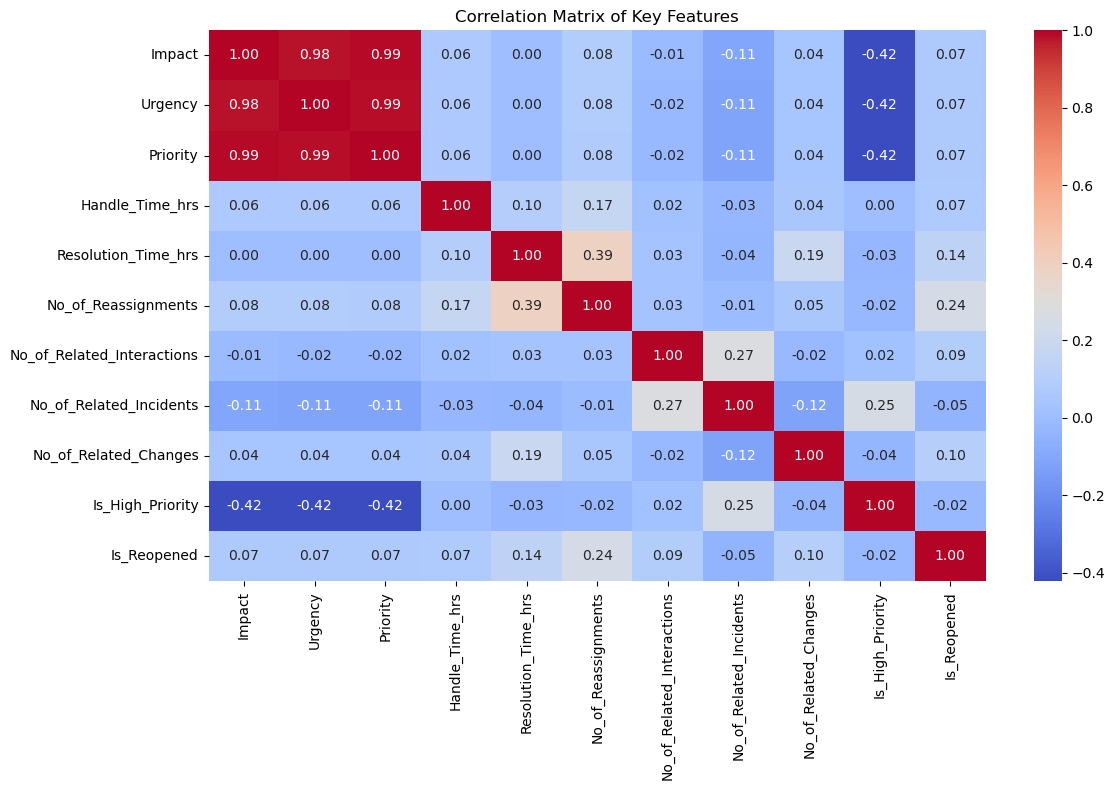

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric columns for correlation
numeric_cols = [
    'Impact', 'Urgency', 'Priority', 'Handle_Time_hrs',
    'Resolution_Time_hrs', 'No_of_Reassignments',
    'No_of_Related_Interactions', 'No_of_Related_Incidents',
    'No_of_Related_Changes', 'Is_High_Priority', 'Is_Reopened'
]

# Filter available columns
available_cols = [col for col in numeric_cols if col in df_clean.columns]

# Compute correlation matrix
corr_matrix = df_clean[available_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Key Features")
plt.tight_layout()
plt.show()


# Model Building and Model Evaluation

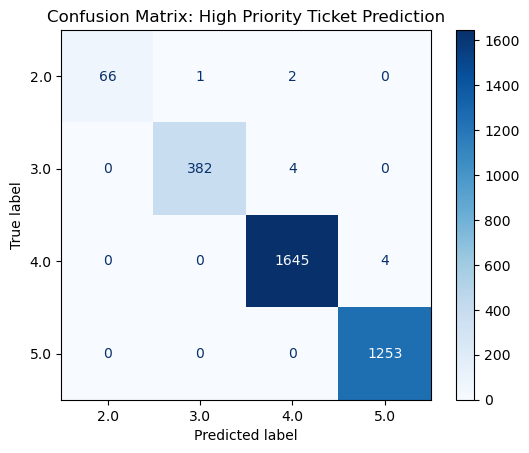


Classification Report:
              precision    recall  f1-score      support
2.0            1.000000  0.956522  0.977778    69.000000
3.0            0.997389  0.989637  0.993498   386.000000
4.0            0.996366  0.997574  0.996970  1649.000000
5.0            0.996818  1.000000  0.998406  1253.000000
accuracy       0.996723  0.996723  0.996723     0.996723
macro avg      0.997643  0.985933  0.991663  3357.000000
weighted avg   0.996727  0.996723  0.996712  3357.000000


C:\Users\hp\AppData\Local\Temp\ipykernel_10760\3118089297.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values[:15], y=feature_importances.index[:15], palette='viridis')  # top 15


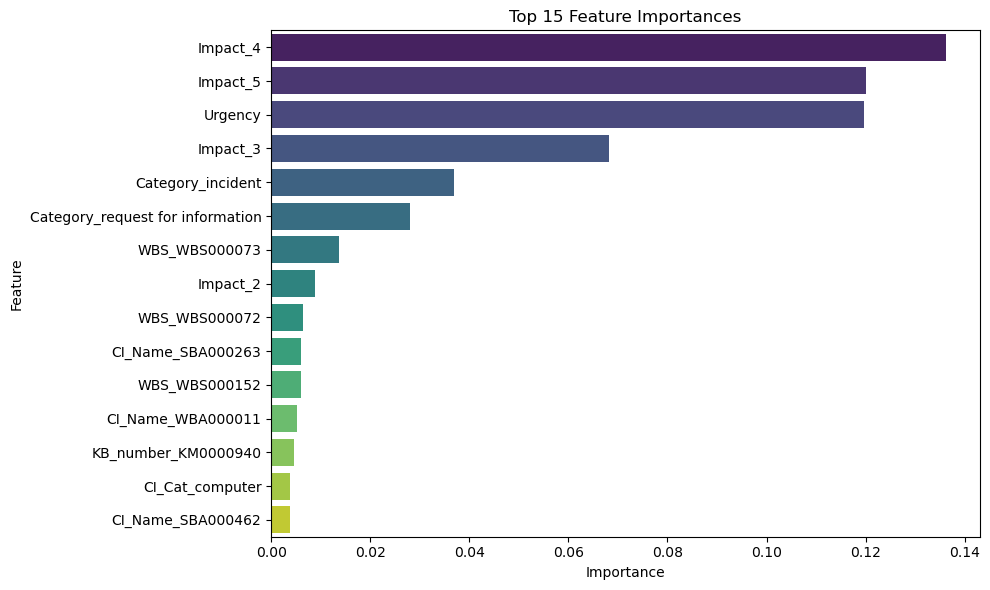

In [14]:
#  Use Case 1: Predicting High Priority Tickets

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define features and target
X = df.drop(columns=["Priority"])
y = df["Priority"]



# 2. One-hot encode categorical columns
X_encoded = pd.get_dummies(X)

# Drop rows with missing target or features
df = df.dropna(subset=['Priority'])  # Ensure 'Priority' has no NaNs


# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 4. Train the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# 5. Predict and evaluate
y_pred = clf.predict(X_test)

# 6. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: High Priority Ticket Prediction")
plt.show()

# 7. Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\nClassification Report:")
print(report_df)

# 8. Feature Importance Plot
features = X_encoded.columns
feature_importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values[:15], y=feature_importances.index[:15], palette='viridis')  # top 15
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



C:\Users\hp\AppData\Local\Temp\ipykernel_10760\3298141508.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_forecast.set_index('Open_Time').resample('M').size().reset_index()
09:47:14 - cmdstanpy - INFO - Chain [1] start processing


09:47:14 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\hp\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


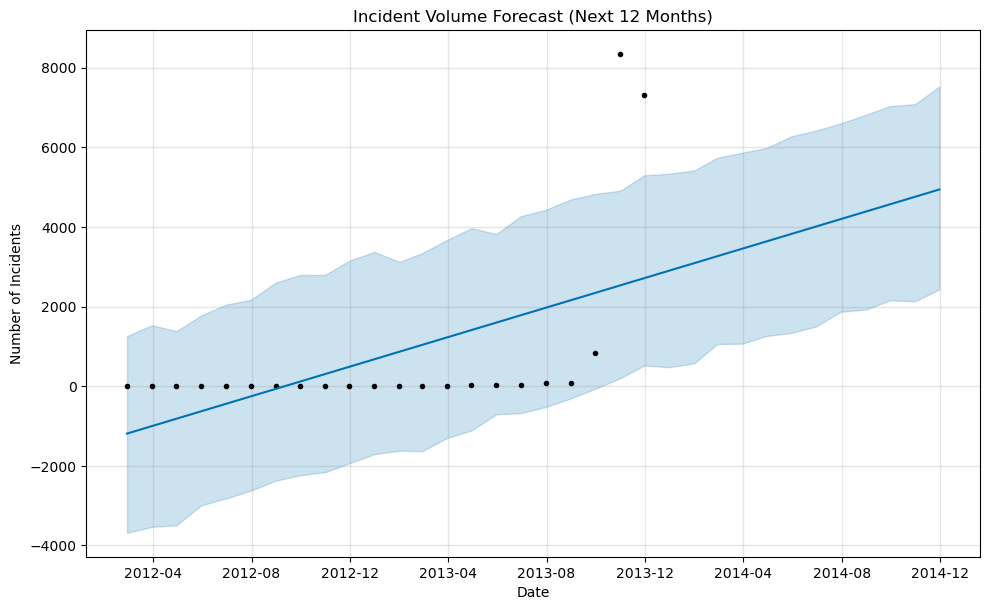

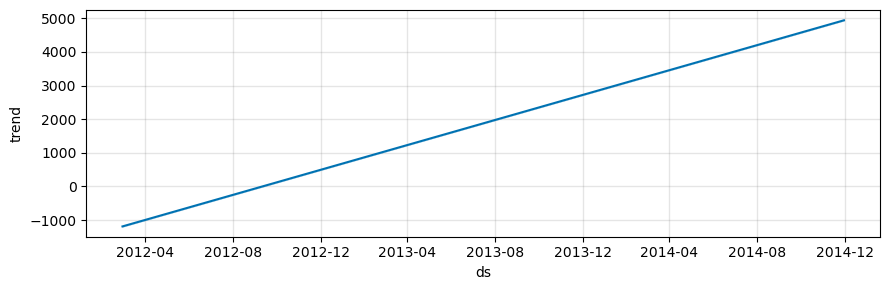

In [16]:
#Forecasting Incident Volume

!pip install prophet pandas matplotlib

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Step 1: Prepare data for time series
df_forecast = df_clean.copy()

# Ensure datetime format
df_forecast['Open_Time'] = pd.to_datetime(df_forecast['Open_Time'], errors='coerce')

# Group incidents by month
df_monthly = df_forecast.set_index('Open_Time').resample('M').size().reset_index()
df_monthly.columns = ['ds', 'y']  # Prophet requires these exact column names

# Step 2: Create and train the Prophet model
model = Prophet()
model.fit(df_monthly)

# Step 3: Make future dataframe (12 months forecast)
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Step 4: Plot forecast
fig1 = model.plot(forecast)
plt.title("Incident Volume Forecast (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Number of Incidents")
plt.show()

# Optional: Component plots (trend, weekly, yearly)
fig2 = model.plot_components(forecast)
plt.show()


Confusion Matrix:
[[0 1 0]
 [0 2 0]
 [0 0 1]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         1

    accuracy                           0.75         4
   macro avg       0.56      0.67      0.60         4
weighted avg       0.58      0.75      0.65         4



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Temp\ipykernel_10760\47

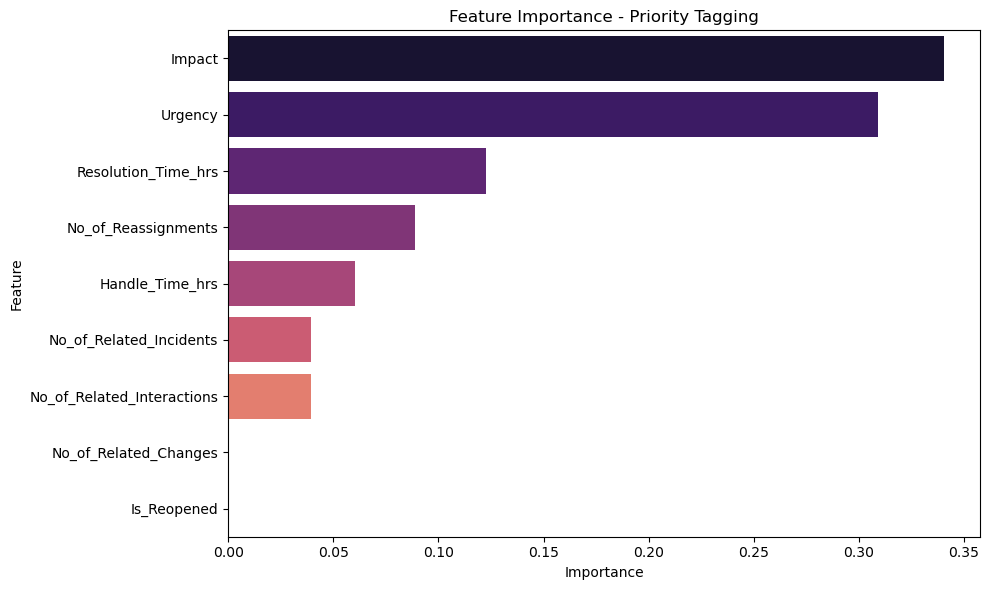

In [17]:
# Auto-tagging Tickets

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Preprocess dataset
df_priority = df_clean.copy()

# Drop rows with missing Priority and necessary features
features_priority = [
    'Impact', 'Urgency', 'Handle_Time_hrs', 'Resolution_Time_hrs',
    'No_of_Reassignments', 'No_of_Related_Interactions',
    'No_of_Related_Incidents', 'No_of_Related_Changes', 'Is_Reopened'
]
df_priority = df_priority[features_priority + ['Priority']].dropna()

# Step 2: Train-test split
X = df_priority[features_priority]
y = df_priority['Priority'].astype(int)  # Ensure integer classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = clf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 5: Plot feature importances
feature_importances = pd.Series(clf.feature_importances_, index=features_priority).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='magma')
plt.title('Feature Importance - Priority Tagging')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Confusion Matrix:
[[4]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\hp\AppData\Local\Temp\ipykernel_10760\2919018382.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='rocket')


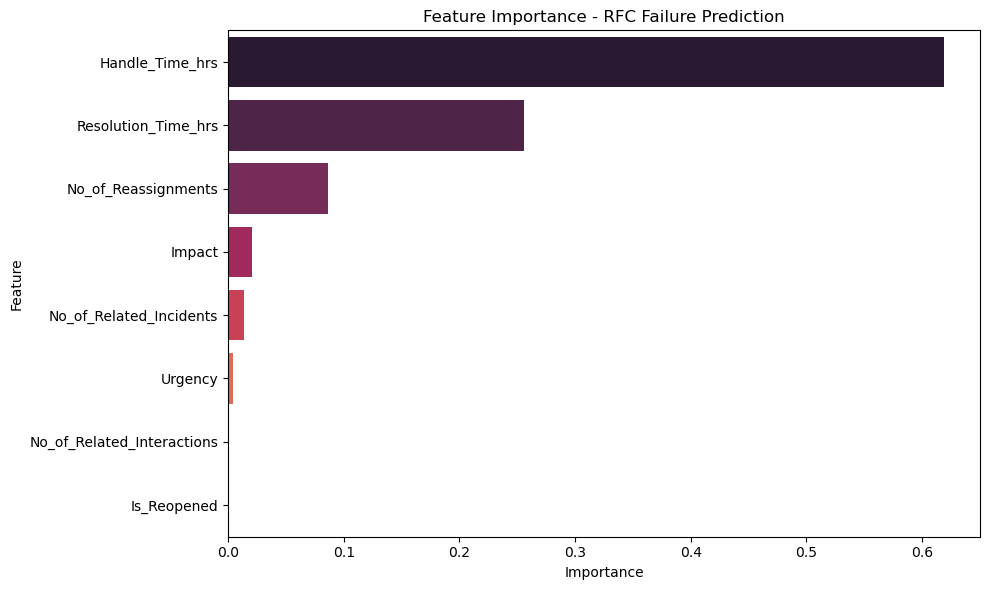

In [18]:
# Predicting RFC Failure / Misconfiguration


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter only rows with RFC data
df_rfc = df_clean[df_clean['No_of_Related_Changes'].notnull()].copy()

# Step 2: Define failure conditions based on Closure_Code
failure_keywords = ['error', 'fail', 'misconfiguration', 'incorrect']
df_rfc['RFC_Failure'] = df_rfc['Closure_Code'].str.lower().apply(
    lambda x: 1 if pd.notnull(x) and any(word in x for word in failure_keywords) else 0
)

# Step 3: Select features
features_rfc = [
    'Impact', 'Urgency', 'Handle_Time_hrs', 'Resolution_Time_hrs',
    'No_of_Reassignments', 'No_of_Related_Incidents',
    'No_of_Related_Interactions', 'Is_Reopened'
]

# Drop missing values
df_rfc = df_rfc[features_rfc + ['RFC_Failure']].dropna()

# Step 4: Train-test split
X = df_rfc[features_rfc]
y = df_rfc['RFC_Failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 6: Evaluate
y_pred = clf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Feature Importance
feature_importances = pd.Series(clf.feature_importances_, index=features_rfc).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='rocket')
plt.title('Feature Importance - RFC Failure Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
